In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
def add_intercept(X):
    '''add X0 = 1 to features
    ex.: [0.23, 0.45, 0.56] --> [ 1.0, 0.23, 0.45, 0.56 ]'''
    
    intercept = np.ones((X.shape[0], 1))  
    return np.concatenate((intercept, X), axis=1)

In [3]:
def sigmoid(phi):
    return 1 / (1 + np.exp(-phi))

In [4]:
def loss(h, y):
    '''Loss function'''

    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [5]:
def train(X, y, iterations, learning_rate):
    X = add_intercept(X)  # X will get a result with "zero" feature

    weights = np.zeros(X.shape[1])  #  inicializing our weights vector filled with zeros
    loss_history = np.zeros((iterations,1))
    
    for i in range(iterations):  # implementing Gradient Descent algorithm
        phi = np.dot(X, weights)  #  calculate the product of the weights and predictor matrix
        h = sigmoid(phi)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
        loss_history[i] = loss(h, y)
    return weights, loss_history

In [6]:
def predict_prob(X, weights):  
    X = add_intercept(X)
    return sigmoid(np.dot(X, weights))

0.0011695102650555137


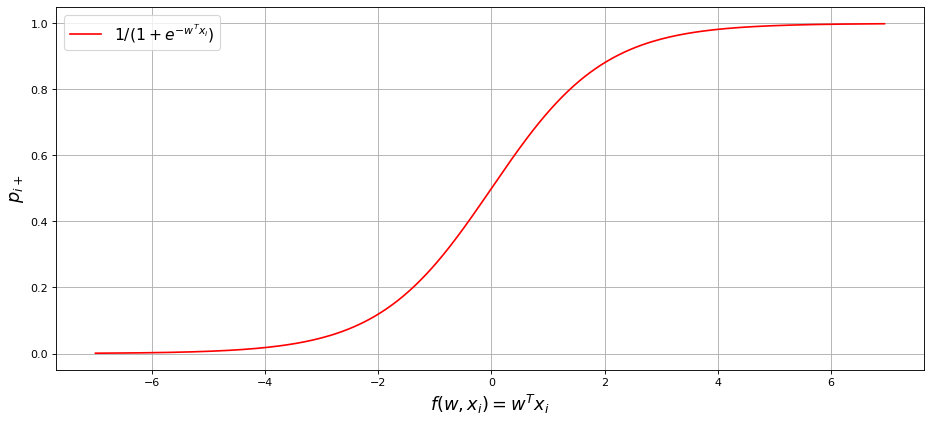

In [7]:
phi = np.arange(-7,7,0.05)
p = []
print(sigmoid(phi[5]))
for i in phi:
    p.append(sigmoid(i))

fig, axes = plt.subplots(figsize = (14,6), dpi = 80)
plt.plot(phi, p, color = 'red', label = '$ 1 / (1+e^{-w^Tx_i})$')
plt.xlabel('$f(w,x_i) = w^Tx_i$', size = 16)
plt.ylabel('$p_{i+}$', size = 16)
plt.legend(prop = {'size': 14})
plt.grid(True)
plt.show()

## Определим и визуализируем наши данные. Воспользуемся make_classification для создания задачи классификации: выборка состоит из тысячи объектов,  2 признака

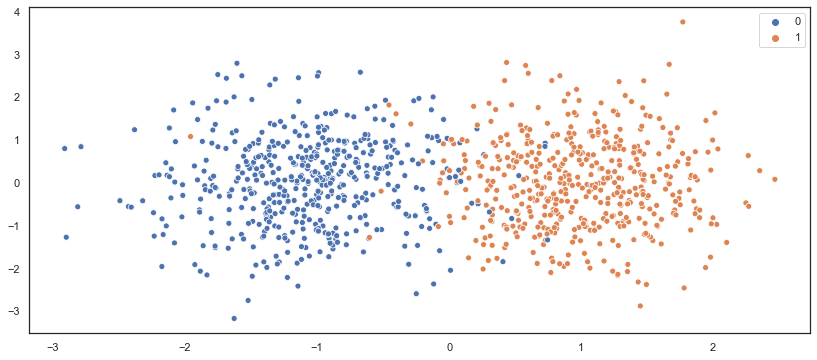

In [8]:
X2, y2 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.set(rc={'figure.figsize':(14,6)})
sns.set_style('white')
sns.scatterplot(X2[:,0],X2[:,1],hue=y2.reshape(-1))

#### Разобьем наши данные на тренировочные и тестовые в соотношении 0.2

In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

 #### Тренируем нашу логистическую регессию. На выходе получаем оптимальные веса и функцию потерь

In [10]:
iterations = 1500
learning_rate = 0.03
weights2 = train(X_train2, y_train2, iterations, learning_rate)[0]

print('Оптимальные веса:', weights2)

Оптимальные веса: [0.0381725  3.36659696 0.04967633]


#### Посмотрим на функцию потерь

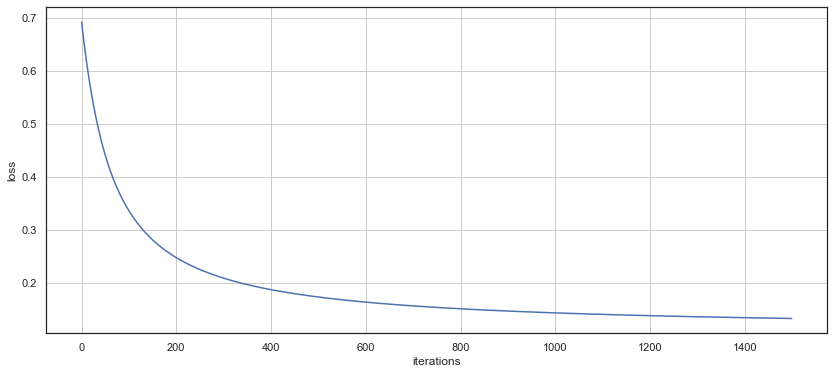

In [11]:
cost = train(X_train2, y_train2, 1500, 0.03)[1]
plt.figure(figsize=(14,6))
plt.plot(cost)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

#### Проверим нашу логистическую регрессию на тестовой выборке

In [12]:
y_pred2 = [int(round(x)) for x in predict_prob(X_test2, weights2).flatten()]

score = accuracy_score(y_test2, y_pred2)
print(score)

0.975


#### Посмотрим как выглядит разделяющаяся плоскость

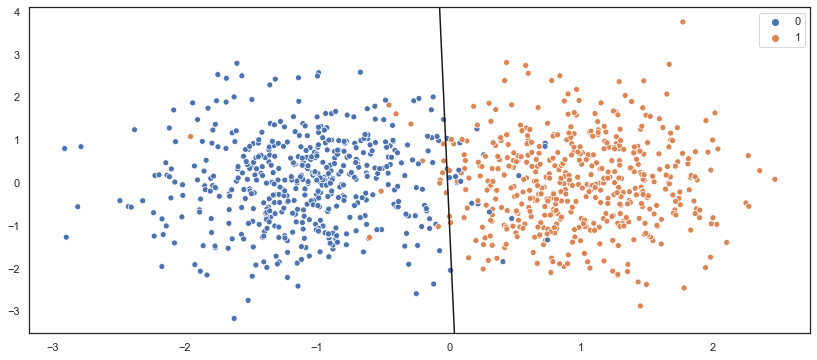

In [13]:
slope = -(weights2[1] / weights2[2])
intercept = -(weights2[0] / weights2[2])

sns.set_style('white')
sns.scatterplot(X2[:,0],X2[:,1],hue=y2.reshape(-1))

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k")

#### Проверим, бьется ли наша логистическая регрессия с встроенным пакетом 

In [14]:
model = LogisticRegression()

model.fit(X_train2, y_train2)
prediction = model.predict(X_test2)
print(accuracy_score(y_test2, prediction))
parameters = model.coef_
print(parameters)

0.97
[[4.43616861 0.13842093]]
